In [1]:
import phate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from  Data_Selection import *

In [2]:
# Load CSV into a DataFrame
file = 'df_main.csv'
data = pd.read_csv(file)

# Display the first few rows of the data
print(data.head())

   cellidx      TBX6       BRA      CDX2      SOX2      SOX1  \
0        0  0.541198  0.228724  1.136731  2.638387  0.676792   
1        1  0.562709  0.153176  1.251472  0.776583  0.694261   
2        2  0.637590  0.240679  1.486664  3.752942  0.682324   
3        3  0.640359  0.184531  1.614646  4.068103  0.828319   
4        4  0.639919  0.153728  1.823096  2.079683  0.990685   

                   filename  timepoint  sample  
0  D2.5_A2_A02_003.fcs .csv        2.5       0  
1  D2.5_A2_A02_003.fcs .csv        2.5       0  
2  D2.5_A2_A02_003.fcs .csv        2.5       0  
3  D2.5_A2_A02_003.fcs .csv        2.5       0  
4  D2.5_A2_A02_003.fcs .csv        2.5       0  


In [10]:
selected_data, combined_equal_data  = data_selector(7200, file)

In [12]:
print(selected_data)
print(combined_equal_data)

           TBX6       BRA      CDX2      SOX2      SOX1
0      0.712941  0.245024  1.804050  2.118150  0.748812
1      0.396271  0.123065  1.012057  2.676406  0.521711
2      0.647942  0.200438  1.300215  5.706961  0.646797
3      0.425355  0.157897  0.854942  1.748533  0.441205
4      0.381848  0.096692  0.729118  0.508345  0.481436
...         ...       ...       ...       ...       ...
50395  2.393723  0.187909  0.719677  0.206253  0.811701
50396  0.722864  0.448907  1.494106  4.268627  1.728922
50397  0.599488  0.364155  2.854191  1.081338  1.334845
50398  0.708004  0.285362  0.973050  0.354309  0.953656
50399  0.454967  0.262575  0.664267  0.188191  0.667618

[50400 rows x 5 columns]
           TBX6       BRA      CDX2      SOX2      SOX1  timepoint
0      0.712941  0.245024  1.804050  2.118150  0.748812        2.0
1      0.396271  0.123065  1.012057  2.676406  0.521711        2.0
2      0.647942  0.200438  1.300215  5.706961  0.646797        2.0
3      0.425355  0.157897  0.85494

In [13]:
phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(selected_data)

Calculating PHATE...
  Running PHATE on 50400 observations and 5 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 3.48 seconds.
    Calculating affinities...
    Calculated affinities in 0.13 seconds.
  Calculated graph and diffusion operator in 3.63 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 3.16 seconds.
    Calculating KMeans...
    Calculated KMeans in 4.76 seconds.
  Calculated landmark operator in 8.69 seconds.
  Calculating optimal t...
    Automatically selected t = 32
  Calculated optimal t in 4.33 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.86 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 3.04 seconds.
Calculated PHATE in 20.57 seconds.


In [14]:
print(data_phate)

[[-0.00419246 -0.00980616]
 [-0.0206375  -0.02073829]
 [-0.03047411  0.01411745]
 ...
 [ 0.00762577  0.00808501]
 [ 0.01912777 -0.01227571]
 [ 0.01740454 -0.02288445]]


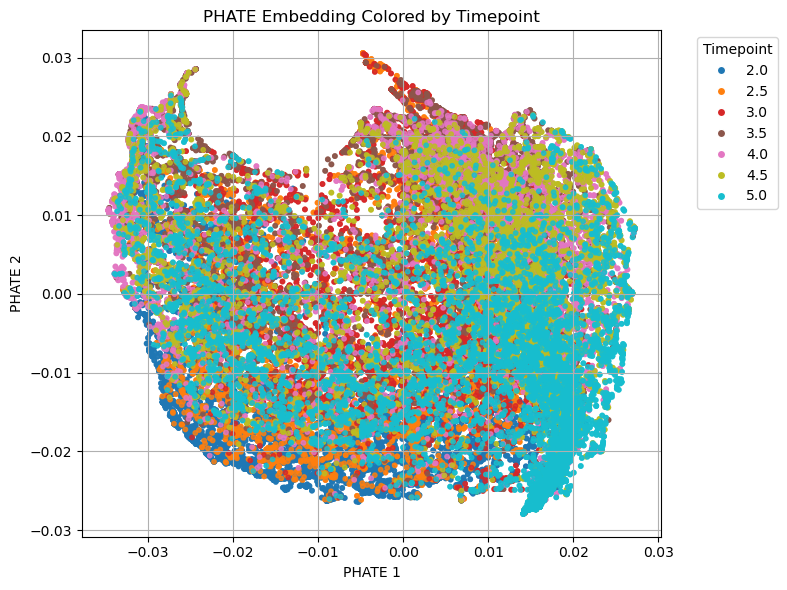

In [15]:
# Extract labels from the 'timepoint' column
labels = combined_equal_data['timepoint'].values

# If timepoint is categorical or string, convert to numerical codes
label_categories = pd.Categorical(labels)
color_codes = label_categories.codes  # For coloring
unique_labels = label_categories.categories  # For legend

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    data_phate[:, 0], data_phate[:, 1],
    c=color_codes,
    cmap='tab10',
    s=10,
    alpha=0.8
)

scatter = plt.scatter(
    data_phate[:, 0], data_phate[:, 1],
    c=color_codes,
    cmap='tab10',
    s=10,
    alpha=0.8
)

# Legend
legend_elements = [
    Line2D([0], [0], marker='o', color='w',
           label=label,
           markerfacecolor=scatter.cmap(i / max(1, len(unique_labels) - 1)),
           markersize=6)
    for i, label in enumerate(unique_labels)
]
plt.legend(handles=legend_elements, title="Timepoint", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("PHATE Embedding Colored by Timepoint")
plt.xlabel("PHATE 1")
plt.ylabel("PHATE 2")
plt.grid(True)
plt.tight_layout()
plt.show()

#each timepoint as a separate plot
#run it in synthetic data

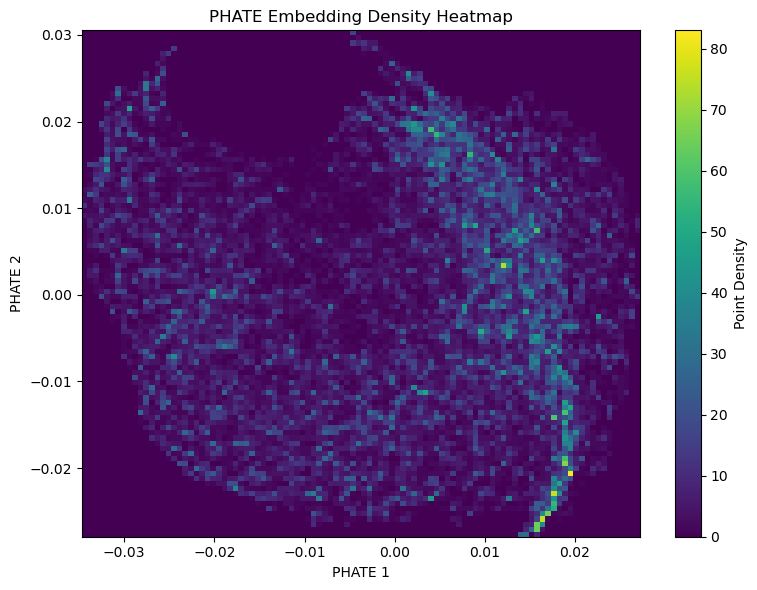

In [16]:
plt.figure(figsize=(8, 6))
plt.hist2d(data_phate[:, 0], data_phate[:, 1], bins=100, cmap='viridis')

plt.colorbar(label='Point Density')
plt.title("PHATE Embedding Density Heatmap")
plt.xlabel("PHATE 1")
plt.ylabel("PHATE 2")
plt.grid(False)
plt.tight_layout()
plt.show()


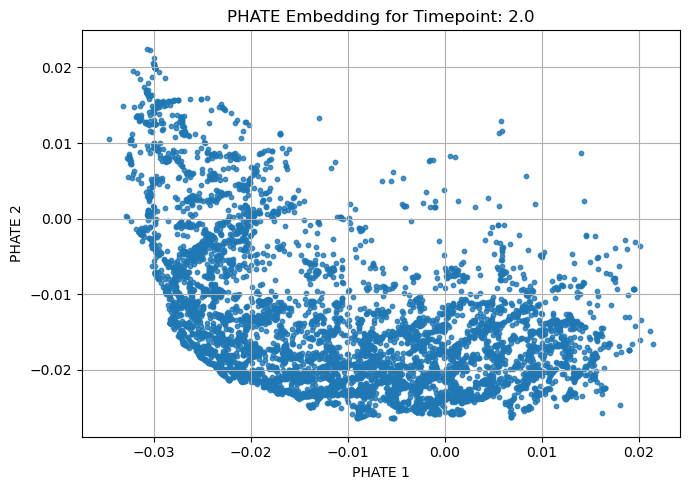

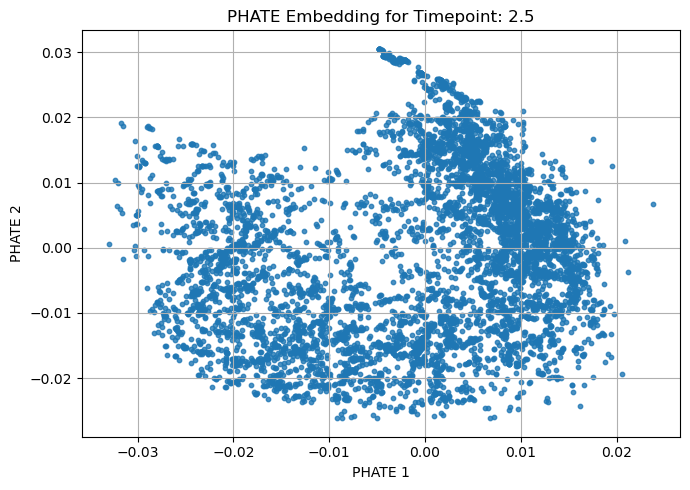

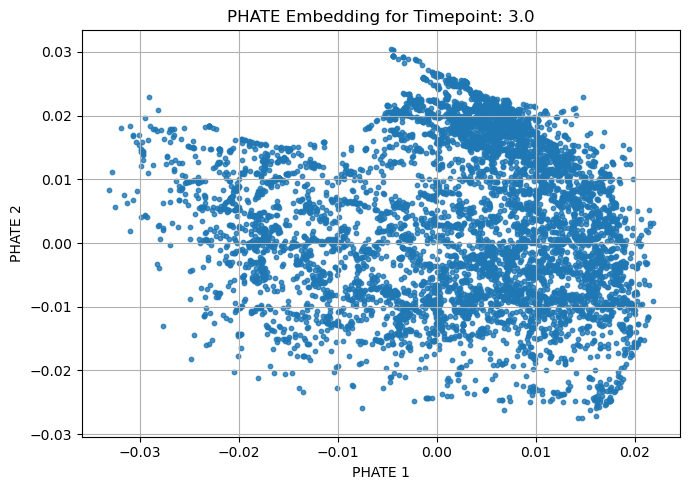

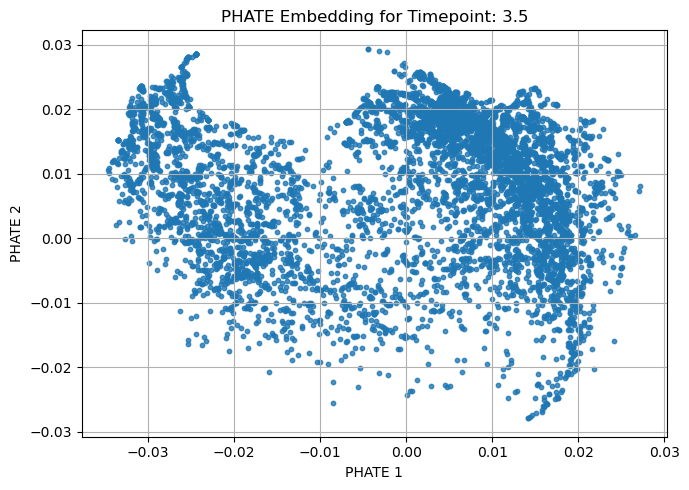

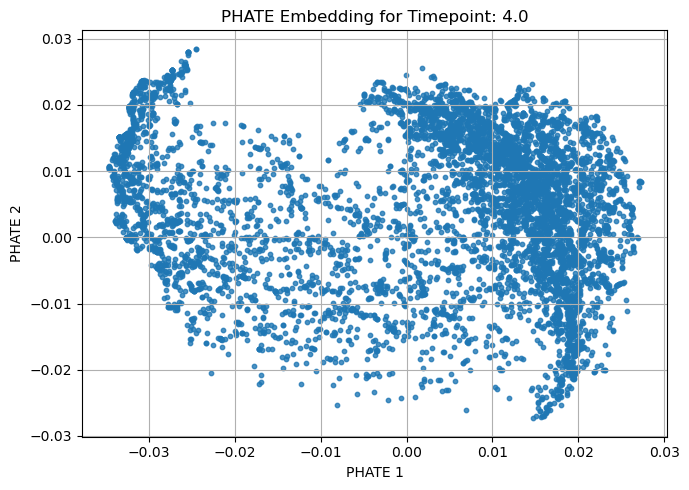

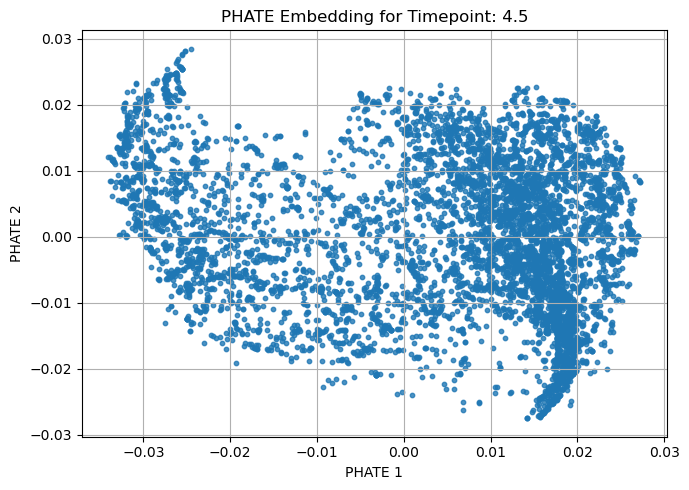

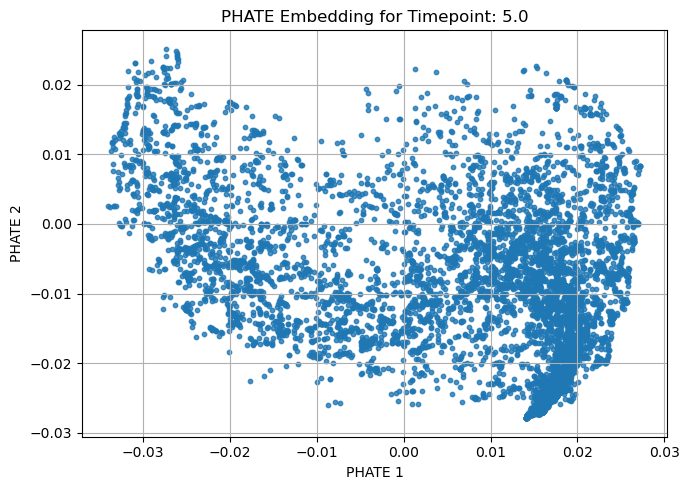

In [17]:
# Get unique timepoints
timepoints = combined_equal_data['timepoint'].unique()

# Loop through each timepoint and plot separately
for timepoint in timepoints:
    # Boolean mask to filter data
    mask = combined_equal_data['timepoint'] == timepoint
    phate_subset = data_phate[mask]

    # Plot
    plt.figure(figsize=(7, 5))
    plt.scatter(
        phate_subset[:, 0], phate_subset[:, 1],
        s=10,
        alpha=0.8,
        c='tab:blue'
    )
    plt.title(f"PHATE Embedding for Timepoint: {timepoint}")
    plt.xlabel("PHATE 1")
    plt.ylabel("PHATE 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [3]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

genes = ['TBX6', 'BRA', 'CDX2','SOX2', 'SOX1']  # Adjust to your actual gene names

for gene in genes:
    gene_expression = combined_equal_data[gene].values  # Continuous values

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(
        data_phate[:, 0], data_phate[:, 1],
        c=gene_expression,
        cmap='viridis',
        s=10,
        alpha=0.8
    )
    plt.colorbar(scatter, label=f'{gene} Expression')
    plt.title(f'PHATE Embedding Colored by {gene} Expression')
    plt.xlabel("PHATE 1")
    plt.ylabel("PHATE 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


NameError: name 'combined_equal_data' is not defined